## Importer sql et la BDD

In [1]:
import sqlite3
%pwd

'/home/sarah.souchon@Digital-Grenoble.local/Sarah/BDD'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Establish a connection to the SQLite database
bbmd = sqlite3.connect('billboard-200.db') #type sqlite3.Connection

## Effectuer des requêtes SQL depuis Pytho pour répondre aux questions suivantes:
* Effectuez la moyenne par année de la caractéristique "acousticness". Quelle est la tendance de cette caractéristique?
* Quelle est l'année dont le niveau sonore "loudness" a été le plus haut?
* Quelle est la clé musicale la plus utilisée - en prenant en compte le mode (e.g. majeur, mineur)?

In [11]:
#Create a cursor object to access the data
cursor = bbmd.cursor()

cursor.execute("SELECT * FROM acoustic_features")
# Récupération des résultats
results = cursor.fetchall()
# Création du dataframe
df = pd.DataFrame(results)

# Affichage du dataframe
print(df.head())


                       0                                   1           2   \
0  0Veyvc3n9AcLSoK3r1dA12                   Voices In My Head  Hoodie SZN   
1  77JzXZonNumWsuXKy9vr3U                              Beasty  Hoodie SZN   
2  18yllZD0TdF7ykcREib8Z1                            I Did It  Hoodie SZN   
3  1wJRveJZLSb1rjhnUHQiv6             Swervin (feat. 6ix9ine)  Hoodie SZN   
4  0jAfdqv18goRTUxm3ilRjb  Startender (feat. Offset and Tyga)  Hoodie SZN   

                       3       4      5         6      7         8    9   \
0  A Boogie Wit da Hoodie  0.0555  0.754  142301.0  0.663  0.000000  6.0   
1  A Boogie Wit da Hoodie  0.2920  0.860  152829.0  0.418  0.000000  7.0   
2  A Boogie Wit da Hoodie  0.1530  0.718  215305.0  0.454  0.000046  8.0   
3  A Boogie Wit da Hoodie  0.0153  0.581  189487.0  0.662  0.000000  9.0   
4  A Boogie Wit da Hoodie  0.0235  0.736  192779.0  0.622  0.000000  6.0   

      10     11   12     13       14   15     16                      17  \
0  0

In [32]:
###Effectuez la moyenne par année de la caractéristique "acousticness". 
query = """SELECT date, AVG(acousticness) AS avg_acousticness 
FROM acoustic_features 
GROUP BY strftime('%Y', date) 
ORDER BY date
"""
cursor.execute(query)
# Récupération des résultats
results = cursor.fetchall()
# Création du dataframe
df = pd.DataFrame(results, columns=['year', 'avg_acousticness'])
# Affichage du dataframe
print(df.head())

###Quelle est la tendance de cette caractéristique?
df.describe()


         year  avg_acousticness
0  1946-01-01          0.900937
1  1952-01-01          0.764000
2  1956-01-01          0.941574
3  1957-10-15          0.839615
4  1958-03-21          0.815065


,avg_acousticness
count,67.000000
mean,0.386420
std,0.188991
min,0.214286
25%,0.265757
50%,0.286757
75%,0.450523
max,0.941574


### Effectuez la moyenne par année de la caractéristique "acousticness". Quelle est la tendance de cette caractéristique?

In [33]:
#Mean acousticness by nb lines
query="""
SELECT SUM(acousticness)/count(acousticness) 
FROM acoustic_features
"""
cursor.execute(query)
print(cursor.fetchall())

[(0.29880584830833323,)]


In [18]:
#Mean acousticness by year
query="""
SELECT acousticness, substr(date,1,4)
FROM acoustic_features
GROUP BY substr(date,1,4)
"""
cursor.execute(query)
print(cursor.fetchall())

[(0.000407, '1900'), (0.839, '1933'), (0.347, '1941'), (0.92, '1944'), (0.88, '1946'), (0.799, '1947'), (0.839, '1948'), (0.968, '1952'), (0.518, '1956'), (0.727, '1957'), (0.733, '1958'), (0.807, '1959'), (0.808, '1960'), (0.971, '1961'), (0.92, '1962'), (0.798, '1963'), (0.108, '1964'), (0.908, '1965'), (0.702, '1966'), (0.0857, '1967'), (0.069, '1968'), (0.0302, '1969'), (0.35, '1970'), (0.262, '1971'), (0.721, '1972'), (0.362, '1973'), (0.33, '1974'), (0.00177, '1975'), (0.343, '1976'), (0.214, '1977'), (0.881, '1978'), (0.0273, '1979'), (0.00532, '1980'), (0.501, '1981'), (0.0219, '1982'), (0.000486, '1983'), (0.0192, '1984'), (0.424, '1985'), (0.743, '1986'), (0.0326, '1987'), (0.111, '1988'), (0.219, '1989'), (0.895, '1990'), (0.00206, '1991'), (0.175, '1992'), (0.692, '1993'), (0.0273, '1994'), (0.334, '1995'), (0.919, '1996'), (0.00213, '1997'), (0.134, '1998'), (0.895, '1999'), (0.404, '2000'), (0.562, '2001'), (0.119, '2002'), (0.0168, '2003'), (0.0258, '2004'), (0.14, '2005

In [34]:
#Count nb of Distinct feature for date as control
query="""
SELECT count(DISTINCT(substr(date,1,4))) 
FROM acoustic_features
"""
cursor.execute(query)
print(cursor.fetchall())

[(72,)]


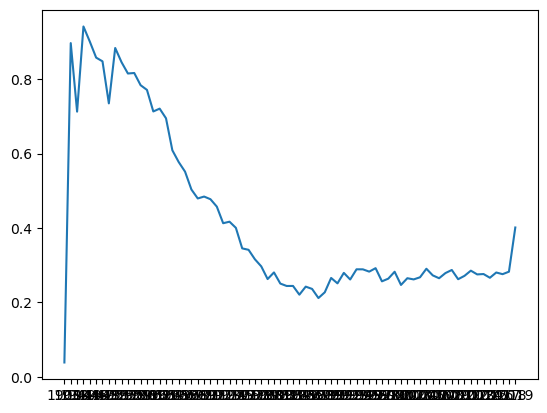

In [20]:
#Tendance
query = '''SELECT DISTINCT SUBSTR(date, 1, 4) as Annee, AVG(acousticness) as AVG_acousticness
            FROM acoustic_features
            GROUP BY SUBSTR(date, 1, 4)
            ORDER BY SUBSTR(date, 1, 4)'''
cursor.execute(query)
test=cursor.fetchall()
x = []
y = []
for row in test:
    x.append(row[0])
    y.append(row[1])
plt.plot(x, y);

<Axes: xlabel='Annee'>

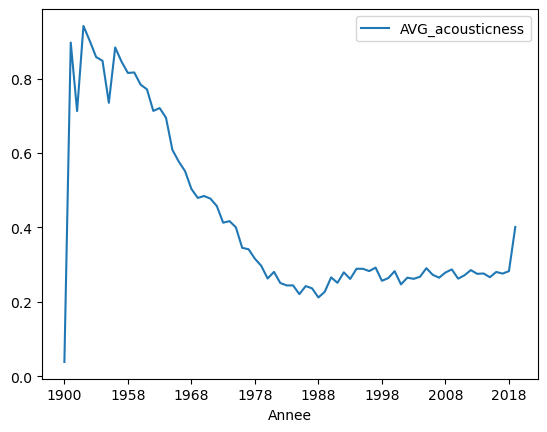

In [21]:
moy_acous_an = pd.read_sql_query(query, bbmd)
moy_acous_an.set_index('Annee').plot()

### Quelle est l'année dont le niveau sonore "loudness" a été le plus haut?

In [22]:
#Année dont le niveau sonore "loudness" cumulé a été le plus haut
query="""
SELECT loudness, substr(date,1,4)
FROM acoustic_features
GROUP BY substr(date,1,4)
"""
loudness_sumbyyear=list(cursor.execute(query))
max(loudness_sumbyyear)

(-3.686, '2012')

In [26]:
#Année dont le niveau sonore "loudness" a été le plus haut pour une donnée
query="""
SELECT max(loudness), substr(date,1,4)
FROM acoustic_features
GROUP BY substr(date,1,4)
"""
loudness_suminyear=list(cursor.execute(query))
max(loudness_suminyear)

(3.744, '1973')

In [23]:
#Année dont le niveau sonore "loudness" cumulé a été le plus haut
query="""
SELECT sum(loudness), substr(date,1,4)
FROM acoustic_features
GROUP BY substr(date,1,4)
"""
loudness_sumforyear=list(cursor.execute(query))
max(loudness_sumforyear)

(-116.75199999999998, '1900')

In [24]:
query="""
SELECT loudness
FROM acoustic_features
GROUP BY substr(date,1,4)
"""
loudness_year_gb=list(cursor.execute(query))
max(loudness_year_gb)

(-3.686,)

In [25]:
#Vrai résultat
query= """
SELECT MAX(loudness_byyear), year FROM
(SELECT AVG(loudness) as loudness_byyear, SUBSTR(date,1,4) as year
FROM acoustic_features
GROUP BY year
ORDER BY year)"""
cursor.execute(query)
print(cursor.fetchall())

[(-7.381286924393974, '2010')]


### Quelle est la clé musicale la plus utilisée - en prenant en compte le mode (e.g. majeur, mineur)?

In [26]:
#https://en.wikipedia.org/wiki/Pitch_class
pitches = ['C, B♯', 'C♯, D♭', 'D', 'D♯, E♭', 'E', 'F', 'F♯, G♭', 'G', 'G♯, A♭', 'A', 'A♯, B♭', 'B' ]
keys = [0,1,2,3,4,5,6,7,8,9,10,11]
pk= {'keys':[0,1,2,3,4,5,6,7,8,9,10,11],'pitches':['C, B♯', 'C♯, D♭', 'D', 'D♯, E♭', 'E', 'F', 'F♯, G♭', 'G', 'G♯, A♭', 'A', 'A♯, B♭', 'B' ]}
df_pk= pd.DataFrame(data=pk)
df_pk

,keys,pitches
0,0,"C, B♯"
1,1,"C♯, D♭"
2,2,D
3,3,"D♯, E♭"
4,4,E
5,5,F
6,6,"F♯, G♭"
7,7,G
8,8,"G♯, A♭"
9,9,A


In [27]:
query="""
SELECT key, count(key), mode
FROM acoustic_features
GROUP BY key
ORDER BY key asc
"""
key_list=pd.DataFrame(cursor.execute(query))
key_list=key_list[1:]
key_list.columns=['keys','count(key)','mode']
key_list

,keys,count(key),mode
1,0.0,41103,1.0
2,1.0,29207,0.0
3,2.0,39098,0.0
4,3.0,10399,0.0
5,4.0,27185,0.0
6,5.0,27829,0.0
7,6.0,19532,0.0
8,7.0,42139,0.0
9,8.0,19144,1.0
10,9.0,37738,1.0


In [28]:
#Merge dataframes des keys/notes et résultats des counts
key_compare= pd.merge(df_pk,key_list)
key_compare

,keys,pitches,count(key),mode
0,0,"C, B♯",41103,1.0
1,1,"C♯, D♭",29207,0.0
2,2,D,39098,0.0
3,3,"D♯, E♭",10399,0.0
4,4,E,27185,0.0
5,5,F,27829,0.0
6,6,"F♯, G♭",19532,0.0
7,7,G,42139,0.0
8,8,"G♯, A♭",19144,1.0
9,9,A,37738,1.0


In [29]:
#major=1 minor=0
query="""
SELECT key, count(mode), mode
FROM acoustic_features
GROUP BY mode
"""
key_mode=list(cursor.execute(query))
key_mode

[(None, 0, None), (6, 100018, 0), (8, 239832, 1)]

In [30]:
#test major vs minor --> Key
query="""
SELECT mode, key, count(key)
FROM acoustic_features
GROUP BY key
"""
key_mode=pd.DataFrame(cursor.execute(query))
key_mode=key_mode[1:]
key_mode.columns=['Mode','Key','count(key)']
key_mode

,Mode,Key,count(key)
1,1.0,0.0,41103
2,0.0,1.0,29207
3,0.0,2.0,39098
4,0.0,3.0,10399
5,0.0,4.0,27185
6,0.0,5.0,27829
7,0.0,6.0,19532
8,0.0,7.0,42139
9,1.0,8.0,19144
10,1.0,9.0,37738


In [138]:
#test major vs minor --> Key
query="""
SELECT (CASE WHEN mode=1.0 then "major" ELSE "minor"END), key, count(key)
FROM acoustic_features
GROUP BY Mode
"""
key_mode=pd.DataFrame(cursor.execute(query))
key_mode=key_mode[1:]
key_mode.columns=['Mode','Key','count(key)']
key_mode #df

,Mode,Key,count(key)
1,minor,6.0,100018
2,major,8.0,239832


In [157]:
pk= {'keys':[0,1,2,3,4,5,6,7,8,9,10,11],'pitches':['C, B♯', 'C♯, D♭', 'D', 'D♯, E♭', 'E', 'F', 'F♯, G♭', 'G', 'G♯, A♭', 'A', 'A♯, B♭', 'B' ]}
df_pk= pd.DataFrame(data=pk)
test=pd.concat([key_mode,df_pk],axis=1,join='inner')
test

,Mode,Key,count(key),keys,pitches
1,minor,6.0,100018,1,"C♯, D♭"
2,major,8.0,239832,2,D


In [ ]:
result = pd.concat([df1, df4], axis=1, join='inner')